In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  

In [2]:
# 读取数据文件
df = pd.read_csv('../data/ads_20250510_185630_224.csv')


# 重命名列名
df.columns = ['timestamp','voltage', 'duration']

# 将时间戳转换为datetime类型
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 显示数据基本信息
print("数据基本信息：")
print(df.info())

# 显示前几行数据
print("\n数据预览：")
display(df.head())


数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27338 entries, 0 to 27337
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timestamp  27338 non-null  datetime64[ns, UTC]
 1   voltage    27338 non-null  float64            
 2   duration   27338 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 640.9 KB
None

数据预览：


,timestamp,voltage,duration
0,2025-05-10 18:56:31.888000+00:00,20.004272,432
1,2025-05-10 18:56:31.021000+00:00,20.050049,565
2,2025-05-10 18:56:31.153000+00:00,20.050049,697
3,2025-05-10 18:56:32.285000+00:00,20.050049,829
4,2025-05-10 18:56:32.417000+00:00,20.050049,961


In [3]:
print("数据统计描述：")
display(df.describe())

数据统计描述：


,voltage,duration
count,27338.000000,2.733800e+04
mean,55.135208,1.886656e+06
std,10.522379,1.090291e+06
min,19.958496,4.320000e+02
25%,47.882080,9.422715e+05
50%,55.801392,1.884989e+06
75%,64.498901,2.830484e+06
max,71.685791,3.946817e+06


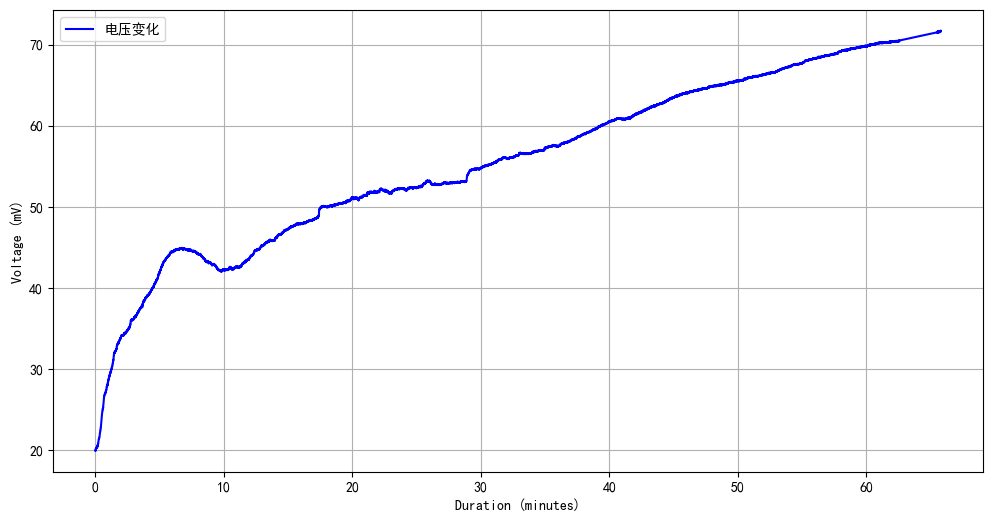

In [4]:
# 绘制电压随时间变化的折线图
plt.figure(figsize=(12, 6))
plt.plot(df['duration'] / 60000, df['voltage'], label='电压变化', color='b')  # 将ms转换为分钟
plt.xlabel('Duration (minutes)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.grid(True)
plt.show()


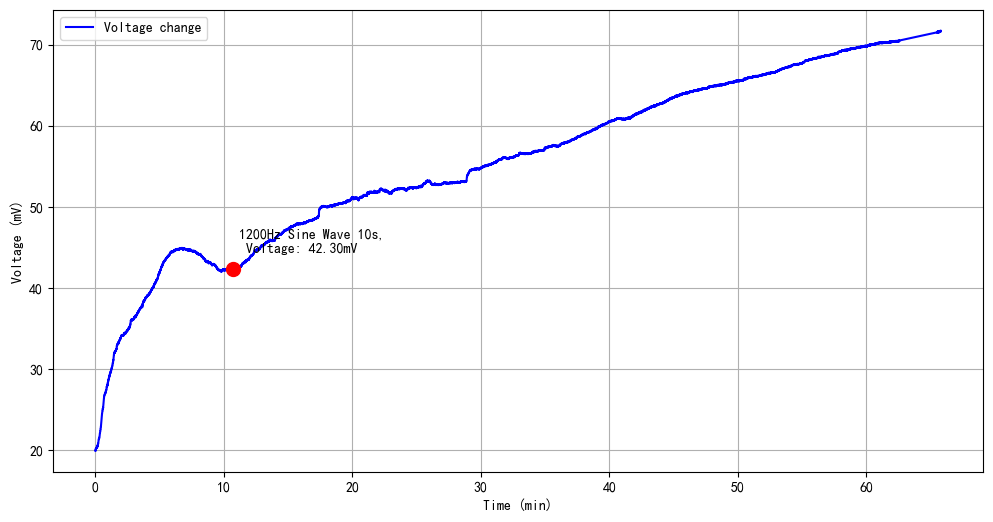

In [5]:
# 将特定时间点转换为datetime格式
specific_time = pd.to_datetime('2025-05-10T19:07:14.355Z')

# 检查这个时间点是否在数据范围内
if specific_time >= df['timestamp'].min() and specific_time <= df['timestamp'].max():
    # 找到最接近的时间点
    closest_idx = (df['timestamp'] - specific_time).abs().idxmin()
    closest_point = df.iloc[closest_idx]
    
    # 绘制电压随时间变化的折线图，并标注特定时间点
    plt.figure(figsize=(12, 6))
    plt.plot(df['duration'] / 60000, df['voltage'], label='Voltage change', color='b')
    
    # 标注特定时间点
    plt.scatter(closest_point['duration'] / 60000, closest_point['voltage'], 
                color='red', s=100, zorder=5)
    plt.annotate(f'1200Hz Sine Wave 10s, \n Voltage: {closest_point["voltage"]:.2f}mV', 
                xy=(closest_point['duration'] / 60000, closest_point['voltage']),
                xytext=(closest_point['duration'] / 60000 + 0.5, closest_point['voltage'] + 2),
                fontsize=10)
    
    plt.xlabel('Time (min)')
    plt.ylabel('Voltage (mV)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("指定的时间点不在数据范围内！")
    print(f"数据时间范围: {df['timestamp'].min()} 到 {df['timestamp'].max()}")


In [6]:
# 读取数据文件
df = pd.read_csv('../data/ads_20250510_200219_199.csv')


# 重命名列名
df.columns = ['timestamp','voltage', 'duration']

# 将时间戳转换为datetime类型
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 显示数据基本信息
print("数据基本信息：")
print(df.info())

# 显示前几行数据
print("\n数据预览：")
display(df.head())


数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15908 entries, 0 to 15907
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timestamp  15908 non-null  datetime64[ns, UTC]
 1   voltage    15908 non-null  float64            
 2   duration   15908 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 373.0 KB
None

数据预览：


,timestamp,voltage,duration
0,2025-05-10 20:02:20.590000+00:00,71.640015,134
1,2025-05-10 20:02:20.725000+00:00,71.594238,269
2,2025-05-10 20:02:20.869000+00:00,71.594238,413
3,2025-05-10 20:02:20.003000+00:00,71.594238,547
4,2025-05-10 20:02:20.137000+00:00,71.594238,681


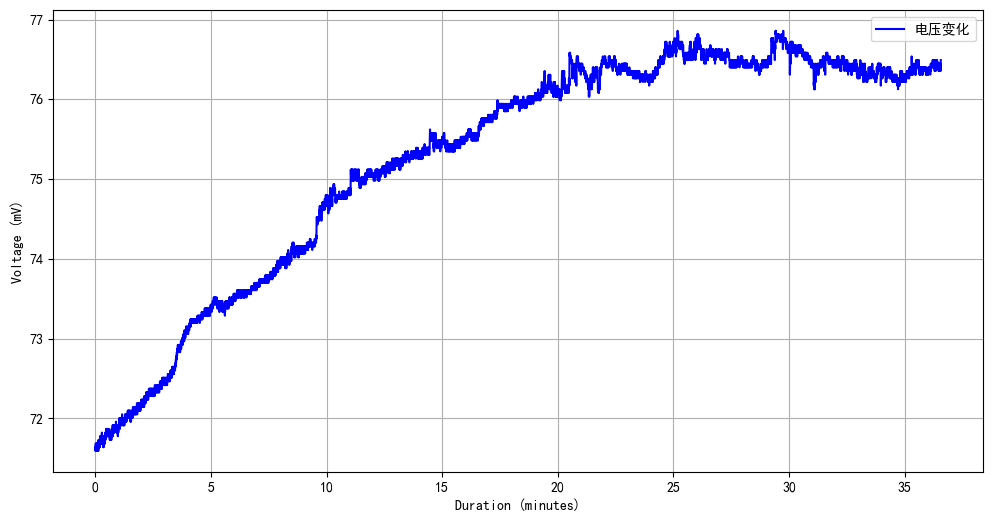

In [7]:
# 绘制电压随时间变化的折线图
plt.figure(figsize=(12, 6))
plt.plot(df['duration'] / 60000, df['voltage'], label='电压变化', color='b')  # 将ms转换为分钟
plt.xlabel('Duration (minutes)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.grid(True)
plt.show()

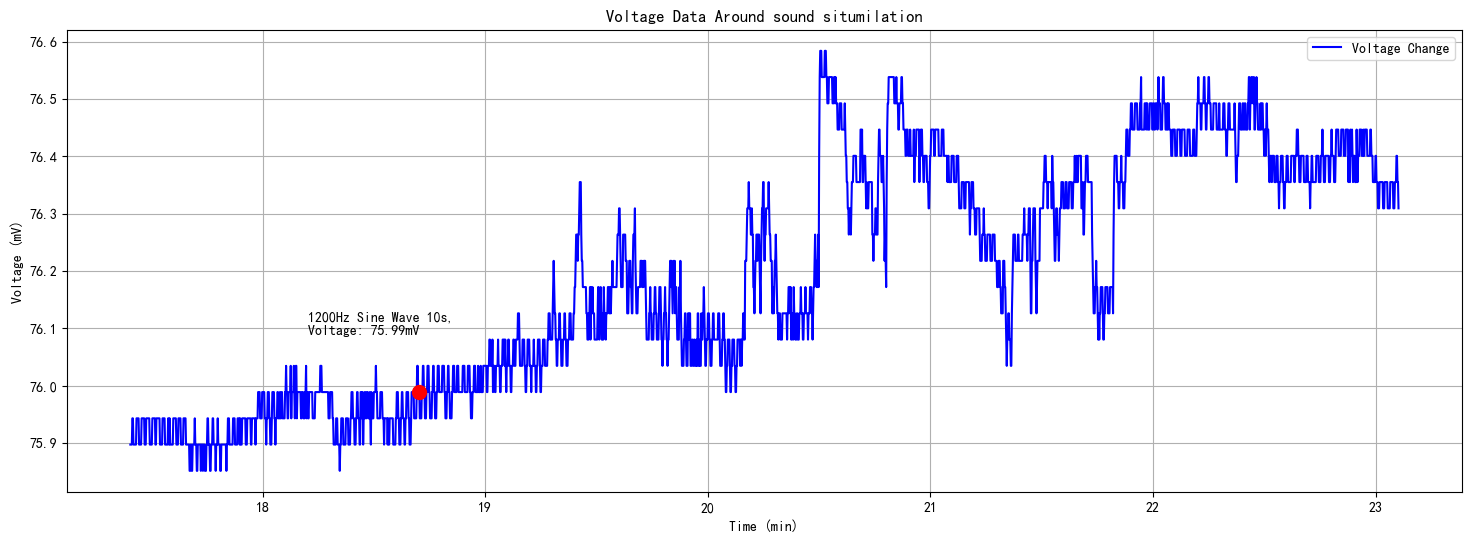

In [8]:
# Convert specific time point to datetime format
specific_time = pd.to_datetime('2025-05-10T20:21:02.634Z')

# Check if this time point is within the data range
if specific_time >= df['timestamp'].min() and specific_time <= df['timestamp'].max():
    # Find the closest time point
    closest_idx = (df['timestamp'] - specific_time).abs().idxmin()
    closest_point = df.iloc[closest_idx]
    
    # Calculate the time window (5 minutes before and after the specific time)
    closest_duration_min = closest_point['duration'] / 60000  # Convert to minutes
    time_window_min = 3  # 5 minutes window
    
    # Filter data within the time window
    min_duration = (closest_duration_min - (time_window_min - 1.7)) * 60000
    max_duration = (closest_duration_min + (time_window_min + 1.4)) * 60000
    filtered_df = df[(df['duration'] >= min_duration) & (df['duration'] <= max_duration)]
    
    # Plot voltage changes over time, and mark the specific time point
    plt.figure(figsize=(18, 6))
    plt.plot(filtered_df['duration'] / 60000, filtered_df['voltage'], label='Voltage Change', color='b')
    
    # Mark the specific time point
    plt.scatter(closest_point['duration'] / 60000, closest_point['voltage'], 
                color='red', s=100, zorder=5)
    plt.annotate(f'1200Hz Sine Wave 10s, \nVoltage: {closest_point["voltage"]:.2f}mV', 
                xy=(closest_point['duration'] / 60000, closest_point['voltage']),
                xytext=(closest_point['duration'] / 60000 - 0.5, closest_point['voltage'] + 0.1),
                fontsize=10)
    
    # Set axis labels and title
    plt.xlabel('Time (min)')
    plt.ylabel('Voltage (mV)')
    plt.title(f'Voltage Data Around sound situmilation')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("The specified time point is not within the data range!")
    print(f"Data time range: {df['timestamp'].min()} to {df['timestamp'].max()}")


In [9]:
# 读取数据文件
df = pd.read_csv('../data/ads_20250510_211746_166.csv')


# 重命名列名
df.columns = ['timestamp','voltage', 'duration']

# 将时间戳转换为datetime类型
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 显示数据基本信息
print("数据基本信息：")
print(df.info())

# 显示前几行数据
print("\n数据预览：")
display(df.head())

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63210 entries, 0 to 63209
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timestamp  63210 non-null  datetime64[ns, UTC]
 1   voltage    63210 non-null  float64            
 2   duration   63210 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 1.4 MB
None

数据预览：


,timestamp,voltage,duration
0,2025-05-10 21:17:48.106000+00:00,78.872681,1703
1,2025-05-10 21:17:48.241000+00:00,78.872681,1838
2,2025-05-10 21:17:48.383000+00:00,78.918457,1980
3,2025-05-10 21:17:48.517000+00:00,78.918457,2114
4,2025-05-10 21:17:49.651000+00:00,78.918457,2248


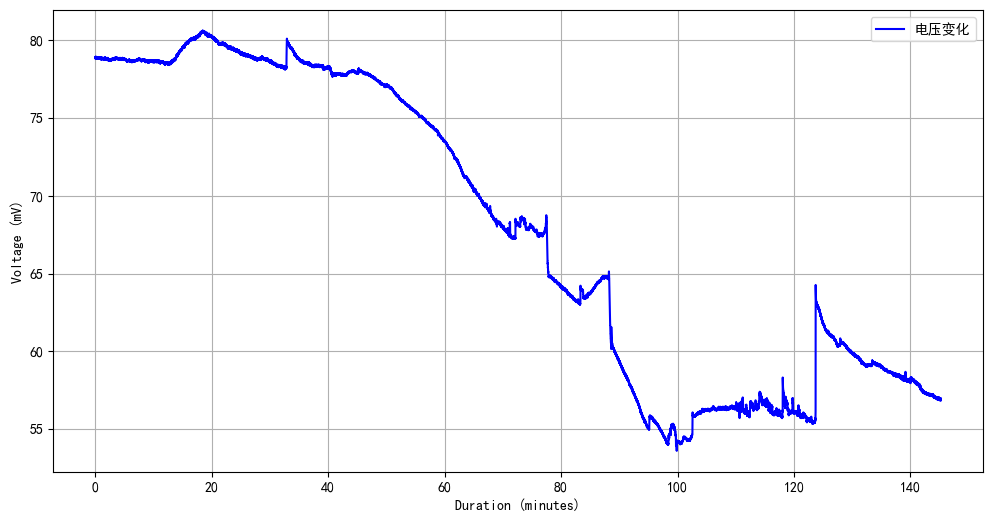

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['duration'] / 60000, df['voltage'], label='电压变化', color='b')  # 将ms转换为分钟
plt.xlabel('Duration (minutes)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.grid(True)
plt.show()